In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model Creation

In [46]:
RawData = pd.read_csv("/content/drive/MyDrive/Medical Insurance Cost/medical_insurance.csv")
y = RawData['charges']
x = RawData.drop(columns=['charges'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=125)

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numeric_features), ('cat', OneHotEncoder(), categorical_features)])

In [47]:
# Linear Regression

linear_regression_model = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
linear_regression_model.fit(x_train, y_train)
y_pred_linear_regression = linear_regression_model.predict(x_test)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

In [48]:
# Decision Tree Regression

decision_tree_model = Pipeline([('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=63))])
decision_tree_model.fit(x_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

In [49]:
# Random Forest Regression

random_forest_model = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=27))])
random_forest_model.fit(x_train, y_train)
y_pred_random_forest = random_forest_model.predict(x_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Model Evaluation



In [50]:
All_3_Preds = [y_pred_linear_regression, y_pred_decision_tree, y_pred_random_forest]
Model_Names = ['Linear Regression', 'Decision Tree', 'Random Forest']

for model_num in range(len(All_3_Preds)):
  print(f"Mean Squared Error for {Model_Names[model_num]}:", np.round(mean_squared_error(y_test, All_3_Preds[model_num])))
  print(f"R Squared value for {Model_Names[model_num]}: {np.round(r2_score(y_test, All_3_Preds[model_num]), 2)}\n")

Mean Squared Error for Linear Regression: 37301618.0
R Squared value for Linear Regression: 0.73

Mean Squared Error for Decision Tree: 12823695.0
R Squared value for Decision Tree: 0.91

Mean Squared Error for Random Forest: 8186098.0
R Squared value for Random Forest: 0.94



In [51]:
# Feature Importances on random_forest_model

one_hot_feature_names = random_forest_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
all_feature_names = numeric_features + list(one_hot_feature_names)
feature_importances = random_forest_model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


for num_feat in numeric_features:
  row = importance_df[importance_df['Feature'] == num_feat]
  print(f"{num_feat}'s importance in making predictions: {np.round(float(row.iloc[:,1])*100, 2)}%")

for cat_feat in categorical_features:
  cat_sum = np.sum(importance_df[importance_df['Feature'].str.startswith(cat_feat)].groupby('Feature')['Importance'].sum())
  print(f"{cat_feat}'s importance in making predictions: {np.round(cat_sum*100, 2)}%")

age's importance in making predictions: 12.53%
bmi's importance in making predictions: 20.97%
children's importance in making predictions: 1.6%
sex's importance in making predictions: 0.6%
smoker's importance in making predictions: 62.6%
region's importance in making predictions: 1.7%


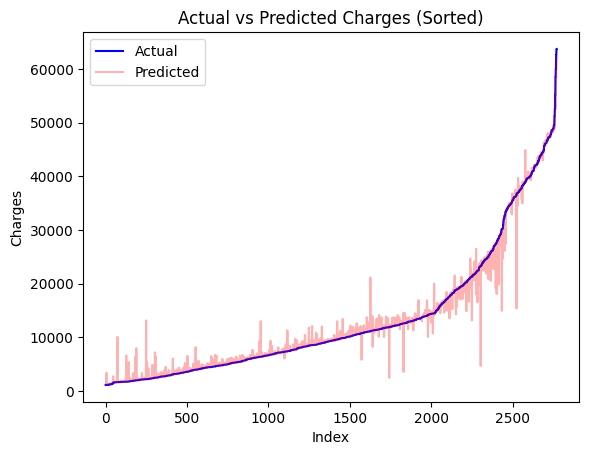

In [52]:
sorted_indices = np.argsort(y)
sorted_y = y[sorted_indices]
sorted_x = x.iloc[sorted_indices]
y_pred_sorted = random_forest_model.predict(sorted_x)

plt.plot(range(len(sorted_y)), sorted_y, color='blue', label='Actual')
plt.plot(range(len(y_pred_sorted)), y_pred_sorted, color='red', label='Predicted', alpha=0.3)

plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges (Sorted)')
plt.legend()

plt.show()